## Esercizio 2.1a
L' obbiettivo è effettuare un random walk su un reticolo cubico discreto, partendo dalla posizione (0,0,0). Le uniche direzioni possibili sono tre x,y,z. Ogni passo è lungo $a=1$ e può essere effettuato in avanti e indietro nelle tre direzioni.

Il numero di passi che ho scelto di effettuare è 100. Ripeto il random walk $M=10^4$ volte dividendo in $n=100$ blocchi.

La simulazione è costituita da due steps:
1. Genero un numero random  $r_1 \in (0,1)$ se $r_1<0.5$ allora effettuo un passo in avanti, se invece $r_1>0.5$ effettuo un passo indietro.

2. In quale direzione vado? Devo generare un altro numero random $r_2 \in (0,1)$ e la direzione è scelta nel seguente modo


$$
\begin{cases}
x \hspace{0.2cm} se \hspace{0.2cm} r_2<1/3 \\
y \hspace{0.2cm} se \hspace{0.2cm}  1/3 < r_2 < 2/3 \\
z \hspace{0.2cm} se \hspace{0.2cm} r_2 > 2/3
\end{cases}
$$

Alla fine di ogni Random walk calcolo a quale distanza sono arrivato con una normale norma.

Per mostrare il comportamento del random walk al variare dei passi che compie mostro i valori finali della distanza dal punto di partenza con l' incertezza (relativi all' ultimo blocco) di 100 random walk con N=1,2,...100. Infine eseguo un fit di questi dati con la funzione $f(N)=k \sqrt N$ ottenendo un k=0.92.


questo è il k ottenuto con il fit:  [0.92240025]


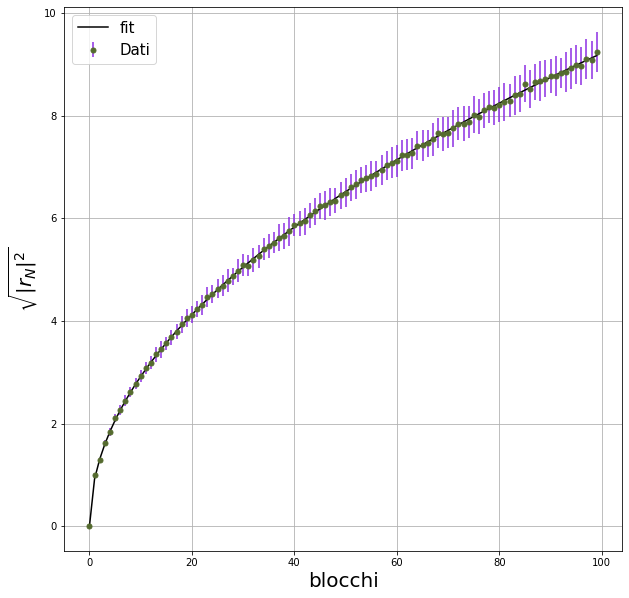

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 

def func(x,k):
	return k*np.sqrt(x)

with open("Risultati.dat") as out:
    Dati=np.loadtxt(out,usecols=(0,1),dtype=float)
    
x=np.arange(100)

k_opt=curve_fit(func,x,Dati[:,0]) # questo è il fit. 
y_fit=func(x,k_opt[0]) #calcolo le y con i dati trovati con il fit

print("questo è il k ottenuto con il fit: ",k_opt[0])

plt.figure(figsize=(10,10))
plt.errorbar(x,Dati[:,0],yerr=Dati[:,1],color='darkolivegreen',ecolor='blueviolet',fmt='o',markersize=5,label='Dati') 
plt.plot(x,y_fit,c='black',label="fit")
plt.xlabel('blocchi',fontsize='20')
plt.ylabel('$\sqrt{|r_N|^2}$',fontsize='20')
plt.legend(loc='upper left',fontsize='15')
plt.grid(True)
plt.show()


Dal grafico si evince come i dati seguono effettivamento l'andamento della funzione $f$. Questo mostra un comportamento diffusivo nel senso che all' aumentare del numero di passi del random walk, non solo aumenta la distanza dall' origine, ma anche la sua incertezza. Questo è naturale dato che più passi faccio maggiore sarà la componente randomica della misura. Più vado lontano più ci sono possibili percorsi.